## Calculating the Return of a Portfolio of Securities

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.

In [1]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers=['C6L.SI','NVDA','LOGI','AAPL']
mydata=pd.DataFrame()
for t in tickers:
    mydata[t]=wb.DataReader(t,data_source='yahoo',start='2010-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3009 entries, 2010-01-04 to 2021-12-23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C6L.SI  3009 non-null   float64
 1   NVDA    2932 non-null   float64
 2   LOGI    2932 non-null   float64
 3   AAPL    2932 non-null   float64
dtypes: float64(4)
memory usage: 117.5 KB


In [4]:
mydata.head()

,C6L.SI,NVDA,LOGI,AAPL
Date,,,,
2010-01-04,12.073689,4.246278,13.961493,6.553027
2010-01-05,11.945415,4.308282,13.851810,6.564354
2010-01-06,11.833177,4.335841,13.883146,6.459939
2010-01-07,11.576633,4.250869,13.671612,6.447999
2010-01-08,11.608701,4.260055,14.267050,6.490866


In [5]:
mydata.tail()

,C6L.SI,NVDA,LOGI,AAPL
Date,,,,
2021-12-17,4.87,278.010010,83.300003,171.139999
2021-12-20,4.81,277.190002,81.860001,169.750000
2021-12-21,4.89,290.750000,84.099998,172.990005
2021-12-22,4.84,294.000000,85.389999,175.639999
2021-12-23,4.91,NaN,NaN,NaN


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [6]:
mydata.iloc[0]

C6L.SI    12.073689
NVDA       4.246278
LOGI      13.961493
AAPL       6.553027
Name: 2010-01-04 00:00:00, dtype: float64

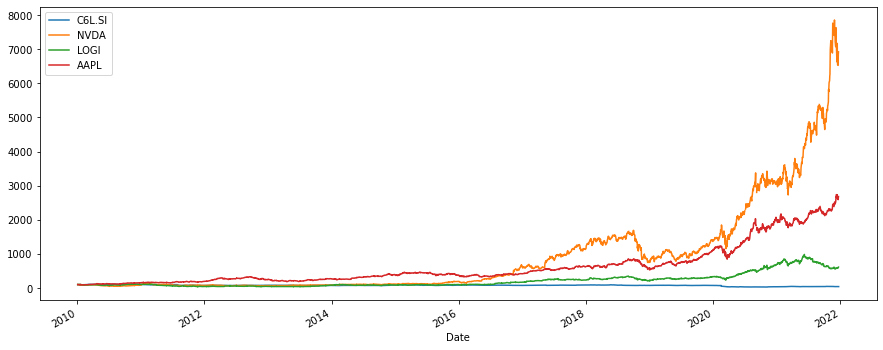

In [7]:
(mydata/mydata.iloc[0]*100).plot(figsize=(15,6));
plt.show()

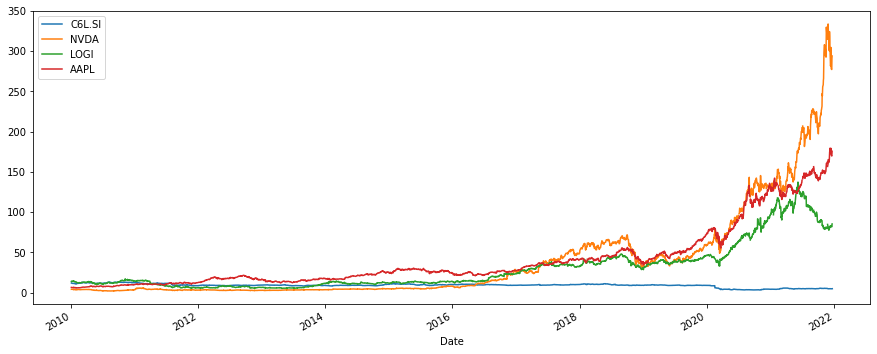

In [8]:
mydata.plot(figsize=(15,6))
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [16]:
returns=(mydata/mydata.shift(1))-1
returns.head()

,C6L.SI,NVDA,LOGI,AAPL
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,-0.010624,0.014602,-0.007856,0.001729
2010-01-06,-0.009396,0.006397,0.002262,-0.015906
2010-01-07,-0.021680,-0.019598,-0.015237,-0.001848
2010-01-08,0.002770,0.002161,0.043553,0.006648


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [17]:
weights=np.array([0.25,0.25,0.25,0.25])
np.dot(returns,weights)

array([        nan, -0.00053746, -0.00416079, ...,  0.02800055,
        0.00790269,         nan])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [18]:
annual_return=returns.mean()*250
annual_return

C6L.SI   -0.048165
NVDA      0.474499
LOGI      0.237006
AAPL      0.314745
dtype: float64

In [19]:
np.dot(annual_return,weights)

0.24452114767165345

Transform the result into a percentage form. 

In [26]:
pfolio_1 = str(round(np.dot(annual_return, weights), 5) * 100) + ' %'
print (pfolio_1)

24.451999999999998 %


Is the return of this portfolio satisfactory?

In [28]:
weights_2=np.array([0.4,0.4,0.15,0.05])

In [29]:
pfolio_2 = str(round(np.dot(annual_return, weights_2), 5) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)

24.451999999999998 %
22.182 %
